<a href="https://colab.research.google.com/github/Ashu156/Neural-time-series-analysis-LFP/blob/main/PAC_Tort_2010.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# Initialize and import required libraries
!pip install tensorpac
!pip install mne
import os
import urllib

import numpy as np
from scipy.io import loadmat

from tensorpac import Pac
from tensorpac.signals import pac_signals_tort

import matplotlib.pyplot as plt

     |████████████████████████████████| 7.7 MB 5.5 MB/s 
  Created wheel for mne: filename=mne-1.0.1-py3-none-any.whl size=7542700 sha256=8075f769511af0009658599208032dc3d25734d958fbbca689025e26ec73a3d8
  Stored in directory: /root/.cache/pip/wheels/b1/16/e2/46ea7fb2215890e506fa85526ccbc2145663ad12c356d04c35
Successfully built mne


In [3]:
# Dataset of signals artificially coupled between 10hz and 100hz :
n_epochs = 20   # number of trials
n_times = 4000  # number of time points
sf = 512.       # sampling frequency

# Create artificially coupled signals using Tort method :
data, time = pac_signals_tort(f_pha=10, f_amp=100, noise=2, n_epochs=n_epochs,
                              dpha=10, damp=10, sf=sf, n_times=n_times)


Phase Amplitude Coupling object defined
    extract phases (n_pha=50) and amplitudes (n_amps=50)
    true PAC estimation using Gaussian Copula PAC (gcPac)


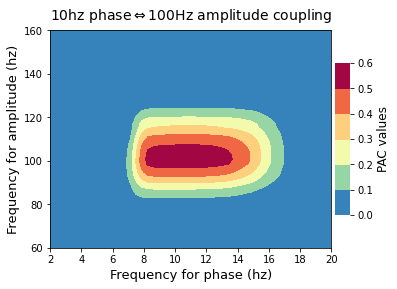

In [4]:
# Analyze
# Define a Pac object
p = Pac(idpac=(6, 0, 0), f_pha='hres', f_amp='hres')
# Filter the data and extract pac
xpac = p.filterfit(sf, data)

# plot your Phase-Amplitude Coupling :
p.comodulogram(xpac.mean(-1), cmap='Spectral_r', plotas='contour', ncontours=5,
               title=r'10hz phase$\Leftrightarrow$100Hz amplitude coupling',
               fz_title=14, fz_labels=13)
# export the figure
# plt.savefig('readme.png', bbox_inches='tight', dpi=300)
p.show()

In [7]:
# Import data file from local machine
from google.colab import files
uploaded = files.upload()

Saving seeg_data_pac.npz to seeg_data_pac.npz


In [8]:
# Load data
filename = os.path.join(os.getcwd(), 'seeg_data_pac.npz')
arch = np.load(filename)
data = arch['data']       # data of a single sEEG contact
sf = float(arch['sf'])    # sampling frequency
times = arch['times']     # time vector
print(f"DATA: (n_trials, n_times)={data.shape}; SAMPLING FREQUENCY={sf}Hz; "
      f"TIME VECTOR: n_times={len(times)}")

DATA: (n_trials, n_times)=(160, 4001); SAMPLING FREQUENCY=1024.0Hz; TIME VECTOR: n_times=4001


Phase Amplitude Coupling object defined
    extract phases (n_pha=50) and amplitudes (n_amps=50)
    true PAC estimation using Gaussian Copula PAC (gcPac)


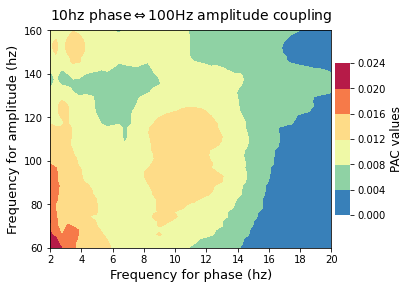

In [9]:
# Analyze
# Define a Pac object
p = Pac(idpac=(6, 0, 0), f_pha='hres', f_amp='hres')
# Filter the data and extract pac
xpac = p.filterfit(sf, data)

# plot your Phase-Amplitude Coupling :
p.comodulogram(xpac.mean(-1), cmap='viridis', plotas='contour', ncontours=50,
               title=r'10hz phase$\Leftrightarrow$100Hz amplitude coupling',
               fz_title=14, fz_labels=13)
# export the figure
# plt.savefig('readme.png', bbox_inches='tight', dpi=300)
p.show()

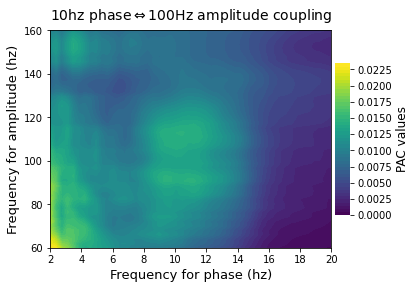

In [11]:
p.comodulogram(xpac.mean(-1), cmap='viridis', plotas='contour', ncontours=50,
               title=r'10hz phase$\Leftrightarrow$100Hz amplitude coupling',
               fz_title=14, fz_labels=13)